# Varying CV folds Results:

In [1]:
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle as pkl
import tensorflow as tf
import keras

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood a

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
sRoot='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/PostErrorAnalysis/BASC122Tangent_CV_Comp/Dense/'

In [4]:
os.path.isdir(sRoot)

True

In [16]:
lsCVAccFiles=glob.glob(f'{sRoot}*ModelHistoryCrossVal*')
lsCVROCFiles=glob.glob(f'{sRoot}*ROCScoreCrossVal*')

In [23]:
pdResults=pd.DataFrame(index=range(len(lsCVFiles)), columns=['Number CV', 'ithCV', 'Val Acc'])#, 'Val ROC AUC'])

In [39]:
# for iFile, sFile in enumerate(lsCVROCFiles):
#     pdResults.loc[iFile]['Val ROC AUC']=pkl.load(open(sFile, 'rb'))
#     pdResults.loc[iFile]['ithCV']=sFile[-3]
#     pdResults.loc[iFile]['Number CV']=int(sFile.split('_')[-2].strip('CVTest'))
for iFile, sFile in enumerate(lsCVAccFiles):
    pdResults.loc[iFile]['Val Acc']=float(np.max(pkl.load(open(sFile, 'rb')).history['val_acc'])    )
    pdResults.loc[iFile]['ithCV']=int(sFile[-3])
    pdResults.loc[iFile]['Number CV']=int(sFile.split('_')[-2].strip('CVTest'))

In [40]:
pdResults

,Number CV,ithCV,Val Acc
0,10,4,0.702703
1,10,5,0.675676
2,8,2,0.635135
3,10,6,0.608108
4,6,6,0.608108
5,6,5,0.689189
6,7,5,0.675676
7,10,8,0.77027
8,10,1,0.743243
9,4,4,0.716216


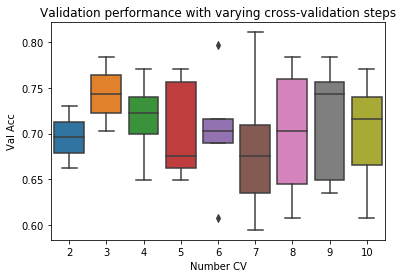

In [45]:
sns.boxplot(x='Number CV', y='Val Acc', data=pdResults)
plt.title('Validation performance with varying cross-validation steps')
plt.savefig('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/PostErrorAnalysis/BASC122Tangent_CV_Comp/Boxplot.png')